<a href="https://colab.research.google.com/github/TKhahahah/Text_Analytics/blob/main/Visaulization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merge data with geo data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyarrow
import pyarrow.parquet as pq

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
taxi_data = pq.read_table('/content/drive/MyDrive/DTW2/cleaned_final.parquet')
taxi_data = taxi_data.to_pandas()
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,congestion_surcharge,Airport_fee,date,time,weekday,duration
0,2,2024-10-01 00:30:44,2024-10-01 00:48:26,1.0,3.00,1.0,162,246,18.400000,1.50,0.00,2.5,0.0,2024-10-01,0,Tuesday,17.700001
1,1,2024-10-01 00:12:20,2024-10-01 00:25:25,1.0,2.20,1.0,48,236,14.200000,3.80,0.00,2.5,0.0,2024-10-01,0,Tuesday,13.083333
2,1,2024-10-01 00:04:46,2024-10-01 00:13:52,1.0,2.70,1.0,142,24,13.500000,3.70,0.00,2.5,0.0,2024-10-01,0,Tuesday,9.100000
3,1,2024-10-01 00:12:10,2024-10-01 00:23:01,1.0,3.10,1.0,233,75,14.200000,2.00,0.00,2.5,0.0,2024-10-01,0,Tuesday,10.850000
5,2,2024-10-01 00:31:20,2024-10-01 00:36:00,2.0,0.97,1.0,137,137,7.200000,2.44,0.00,2.5,0.0,2024-10-01,0,Tuesday,4.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148500,1,2024-12-31 23:42:33,2024-12-31 23:53:54,1.0,1.70,1.0,61,71,11.400000,0.00,0.00,2.5,0.0,2024-12-31,23,Tuesday,11.350000
11148501,1,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,1.0,188,61,13.280000,0.00,0.00,2.5,0.0,2024-12-31,23,Tuesday,10.566667
11148504,1,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,1.0,145,164,21.940001,0.00,6.94,2.5,0.0,2024-12-31,23,Tuesday,20.333334
11148508,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,181,255,4.460000,5.19,0.00,2.5,0.0,2024-12-31,23,Tuesday,25.316668


In [6]:
zone_location = pd.read_csv('/content/drive/MyDrive/DTW2/taxi_zone_lookup.csv')
zone_location

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [7]:
import geopandas as gpd

gdf = gpd.read_file("/content/drive/MyDrive/DTW2/taxi_zones")
print(gdf.columns)


Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [8]:
merged_gdf = gdf.merge(zone_location, on='LocationID', how='left')
print(merged_gdf.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

         Borough                     Zone service_zone  
0            EWR           Newark Airport          EWR  
1 

In [9]:
#create 2nd table to merging pl_df_pandas and merge_gdf
map_data = taxi_data.merge(merged_gdf, left_on='PULocationID', right_on='LocationID', how='left')
map_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,...,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Borough,Zone,service_zone
0,2,2024-10-01 00:30:44,2024-10-01 00:48:26,1.0,3.00,1.0,162,246,18.400000,1.50,...,162.0,0.035270,0.000048,Midtown East,162.0,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",Manhattan,Midtown East,Yellow Zone
1,1,2024-10-01 00:12:20,2024-10-01 00:25:25,1.0,2.20,1.0,48,236,14.200000,3.80,...,48.0,0.043747,0.000094,Clinton East,48.0,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",Manhattan,Clinton East,Yellow Zone
2,1,2024-10-01 00:04:46,2024-10-01 00:13:52,1.0,2.70,1.0,142,24,13.500000,3.70,...,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",Manhattan,Lincoln Square East,Yellow Zone
3,1,2024-10-01 00:12:10,2024-10-01 00:23:01,1.0,3.10,1.0,233,75,14.200000,2.00,...,233.0,0.048036,0.000116,UN/Turtle Bay South,233.0,Manhattan,"MULTIPOLYGON (((993816.792 213230.43, 993857.4...",Manhattan,UN/Turtle Bay South,Yellow Zone
4,2,2024-10-01 00:31:20,2024-10-01 00:36:00,2.0,0.97,1.0,137,137,7.200000,2.44,...,137.0,0.046108,0.000116,Kips Bay,137.0,Manhattan,"POLYGON ((991954.728 209026.462, 991949.076 20...",Manhattan,Kips Bay,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10349847,1,2024-12-31 23:42:33,2024-12-31 23:53:54,1.0,1.70,1.0,61,71,11.400000,0.00,...,61.0,0.117311,0.000511,Crown Heights North,61.0,Brooklyn,"POLYGON ((1003897.089 188278.65, 1003939.593 1...",Brooklyn,Crown Heights North,Boro Zone
10349848,1,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,1.0,188,61,13.280000,0.00,...,188.0,0.097798,0.000313,Prospect-Lefferts Gardens,188.0,Brooklyn,"POLYGON ((996098.526 181302.644, 996121.518 18...",Brooklyn,Prospect-Lefferts Gardens,Boro Zone
10349849,1,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,1.0,145,164,21.940001,0.00,...,145.0,0.114314,0.000347,Long Island City/Hunters Point,145.0,Queens,"POLYGON ((999916.846 213275.139, 1000066.513 2...",Queens,Long Island City/Hunters Point,Boro Zone
10349850,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,181,255,4.460000,5.19,...,181.0,0.089537,0.000307,Park Slope,181.0,Brooklyn,"POLYGON ((990954.947 181851.707, 990815.59 181...",Brooklyn,Park Slope,Boro Zone


In [10]:
map_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'fare_amount', 'tip_amount', 'tolls_amount',
       'congestion_surcharge', 'Airport_fee', 'date', 'time', 'weekday',
       'duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry', 'Borough', 'Zone', 'service_zone'],
      dtype='object')

In [11]:
map_data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
fare_amount,0
tip_amount,0


In [12]:
import geopandas as gpd
import pandas as pd
import numpy as np

def clean_geo_missing(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    """
    ตรวจและจัดการ missing values สำหรับข้อมูลเชิงพื้นที่ (GeoDataFrame)
    - drop geometry ที่หาย
    - fillna สำหรับ attribute (string, numeric)
    - แสดงรายงานก่อนและหลังทำความสะอาด
    """

    print("🔍 ตรวจสอบ missing values ก่อนทำความสะอาด:")
    print(gdf.isna().sum())
    print("-" * 60)

    # 1️⃣ ลบ geometry ที่หาย (เพราะ plot/map ไม่ได้)
    if 'geometry' in gdf.columns:
        missing_geo = gdf['geometry'].isna().sum()
        if missing_geo > 0:
            print(f"🗑️ ลบ geometry ที่หาย {missing_geo} แถว")
            gdf = gdf.dropna(subset=['geometry'])

    # 2️⃣ จัดการคอลัมน์อื่น ๆ
    for col in gdf.columns:
        if col == 'geometry':
            continue  # geometry จัดการแล้ว

        if gdf[col].isna().sum() == 0:
            continue  # ไม่มี missing

        # ✅ ถ้าเป็นตัวเลข — ใช้ median (ถ้าไม่ได้ ใช้ mean)
        if pd.api.types.is_numeric_dtype(gdf[col]):
            median_val = gdf[col].median()
            if np.isnan(median_val):
                mean_val = gdf[col].mean()
                gdf[col] = gdf[col].fillna(mean_val)
                print(f"🔹 {col}: เติมค่า missing ด้วย mean = {mean_val:.2f}")
            else:
                gdf[col] = gdf[col].fillna(median_val)
                print(f"🔹 {col}: เติมค่า missing ด้วย median = {median_val:.2f}")

        # ✅ ถ้าเป็นข้อความ — เติมด้วย 'Unknown'
        elif gdf[col].dtype == 'object' or pd.api.types.is_categorical_dtype(gdf[col]):
            gdf[col] = gdf[col].fillna('Unknown')
            print(f"🔹 {col}: เติมค่า missing ด้วย 'Unknown'")

    # 3️⃣ แสดงรายงานหลังทำ
    print("\n✅ ตรวจสอบอีกครั้งหลังทำความสะอาด:")
    print(gdf.isna().sum())

    print("-" * 60)
    print(f"✅ ข้อมูลสะอาดแล้ว ({len(gdf)} แถว)")
    return gdf


In [13]:
map_data = clean_geo_missing(map_data)


🔍 ตรวจสอบ missing values ก่อนทำความสะอาด:
VendorID                  0
tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
fare_amount               0
tip_amount                0
tolls_amount              0
congestion_surcharge      0
Airport_fee               0
date                      0
time                      0
weekday                   0
duration                  0
OBJECTID                 63
Shape_Leng               63
Shape_Area               63
zone                     63
LocationID               63
borough                  63
geometry                 63
Borough                  63
Zone                     63
service_zone             63
dtype: int64
------------------------------------------------------------
🗑️ ลบ geometry ที่หาย 63 แถว

✅ ตรวจสอบอีกครั้งหลังทำความสะอาด:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropo

## Explore Data

In [ ]:
# Descriptive statistics✅

# Data visualization✅
# Target variable analysis: examine how each feature correlates with or impacts the target/interested variable✅


### Descriptive statistics

In [44]:
taxi_data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,congestion_surcharge,Airport_fee,date,time,duration
count,1.034898e+07,10348975,10348975,1.034898e+07,1.034898e+07,1.034898e+07,1.034898e+07,1.034898e+07,1.034898e+07,1.034898e+07,1.034898e+07,1.034898e+07,1.034898e+07,10348975,1.034898e+07,1.034898e+07
mean,1.781910e+00,2024-11-15 04:43:08.641376,2024-11-15 05:00:30.210602,1.314181e+00,3.283454e+00,1.053286e+00,1.652665e+02,1.637771e+02,1.969640e+01,3.502109e+00,5.502069e-01,2.379908e+00,1.309404e-01,2024-11-14 13:48:52.883496,1.440332e+01,1.735949e+01
min,1.000000e+00,2002-12-31 22:17:43,2002-12-31 22:23:55,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,2.510000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2002-12-31 00:00:00,0.000000e+00,1.016667e+00
25%,2.000000e+00,2024-10-23 23:33:38,2024-10-23 23:49:05.500000,1.000000e+00,1.030000e+00,1.000000e+00,1.320000e+02,1.140000e+02,9.300000e+00,7.200000e-01,0.000000e+00,2.500000e+00,0.000000e+00,2024-10-23 00:00:00,1.100000e+01,8.266666e+00
50%,2.000000e+00,2024-11-15 07:21:52,2024-11-15 07:36:57,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.420000e+01,2.800000e+00,0.000000e+00,2.500000e+00,0.000000e+00,2024-11-15 00:00:00,1.500000e+01,1.365000e+01
75%,2.000000e+00,2024-12-07 19:24:36,2024-12-07 19:44:35.500000,1.000000e+00,3.290000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.260000e+01,4.480000e+00,0.000000e+00,2.500000e+00,0.000000e+00,2024-12-07 00:00:00,1.900000e+01,2.201667e+01
max,6.000000e+00,2025-03-23 20:42:06,2025-03-23 22:52:56,6.000000e+00,9.690000e+01,6.000000e+00,2.630000e+02,2.630000e+02,2.500000e+02,5.725000e+02,1.500000e+02,2.500000e+00,1.750000e+00,2025-03-23 00:00:00,2.300000e+01,1.799000e+02
std,4.137415e-01,NaN,NaN,7.264837e-01,4.101254e+00,3.090792e-01,6.392425e+01,6.905805e+01,1.614975e+01,3.991426e+00,2.023454e+00,6.440318e-01,4.478563e-01,NaN,5.838320e+00,1.344583e+01


### Target variable analysis

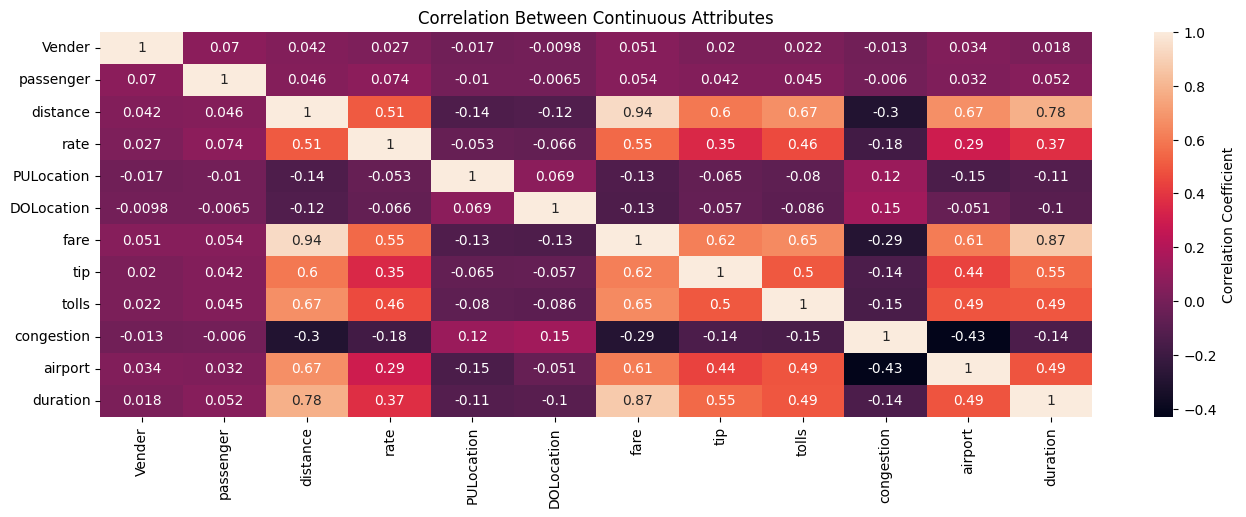

In [43]:
col = ['VendorID',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'fare_amount', 'tip_amount', 'tolls_amount',
       'congestion_surcharge', 'Airport_fee',
       'duration']
label = ['Vender', 'passenger','distance','rate','PULocation','DOLocation','fare','tip','tolls','congestion','airport','duration']
fig, ax = plt.subplots(figsize=(16, 5))
corr_matrix = taxi_data[col].corr()
sns.heatmap(corr_matrix, annot=True, ax=ax, cbar_kws={'label': 'Correlation Coefficient'})
ax.set_xticklabels(label)
ax.set_yticklabels(label)
ax.set_title("Correlation Between Continuous Attributes")
plt.show()

/tmp/ipython-input-3233516214.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(taxi_data['fare_amount'], bins=50, kde=True, palette='viridis')


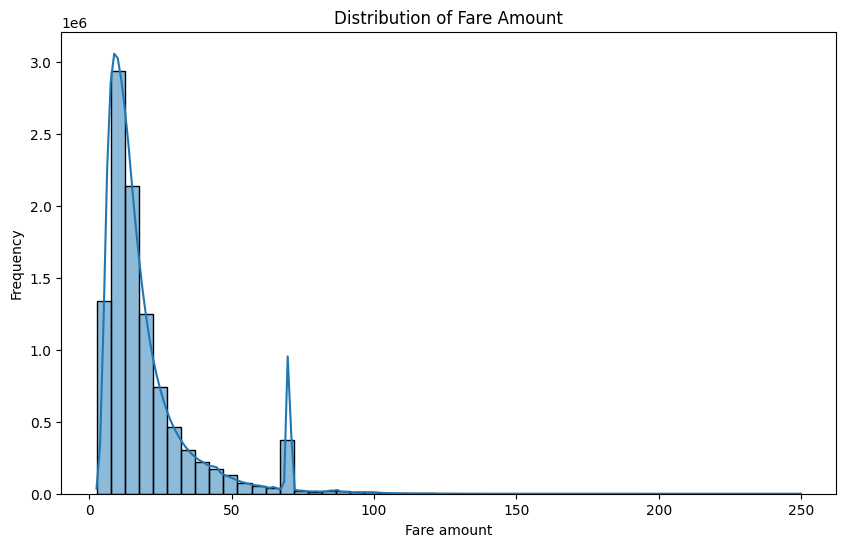

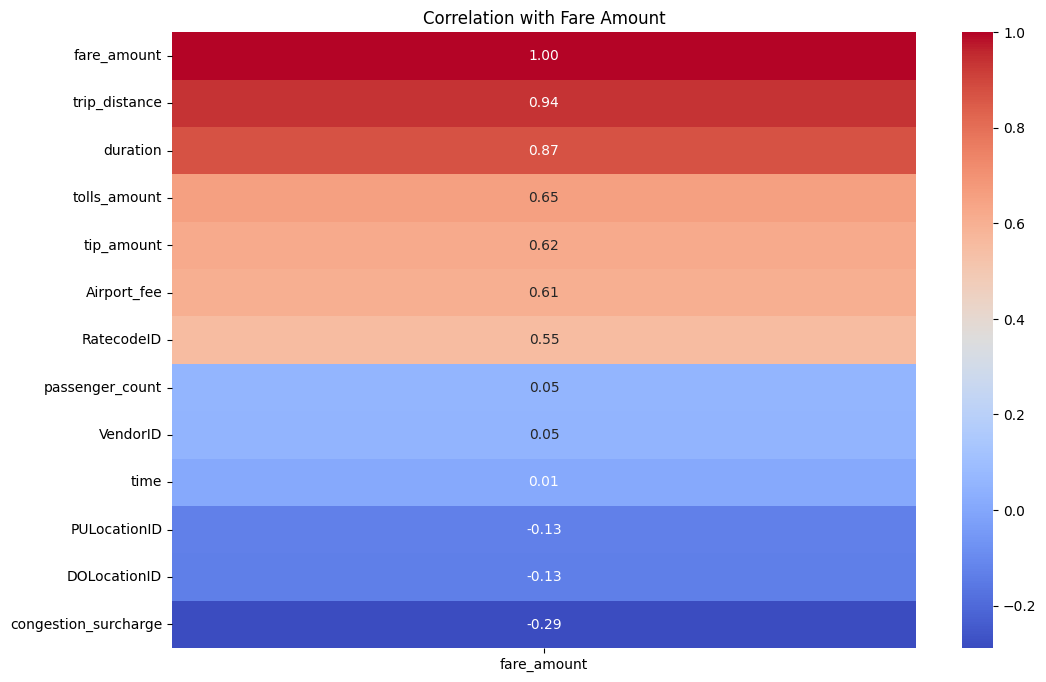

In [60]:
# Data visualization of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(taxi_data['fare_amount'], bins=50, kde=True, palette='viridis')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare amount')
plt.ylabel('Frequency')
plt.show()

# Correlation analysis with the target variable
numerical_cols = taxi_data.select_dtypes(include=np.number).columns
correlation_matrix = taxi_data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['fare_amount']].sort_values(by='fare_amount', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with Fare Amount')
plt.show()

### Data visualization

#### peak hour in 24 hours

In [32]:
# Count the frequency of trips per hour of the day
trips_per_hour = map_data['time'].value_counts().sort_index()
print("Frequency of trips per hour of the day:")
display(trips_per_hour)

Frequency of trips per hour of the day:


,count
time,
0,302709
1,193686
2,122116
3,79034
4,57769
5,63140
6,138137
7,282134
8,383044


/tmp/ipython-input-1374970976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='plasma')


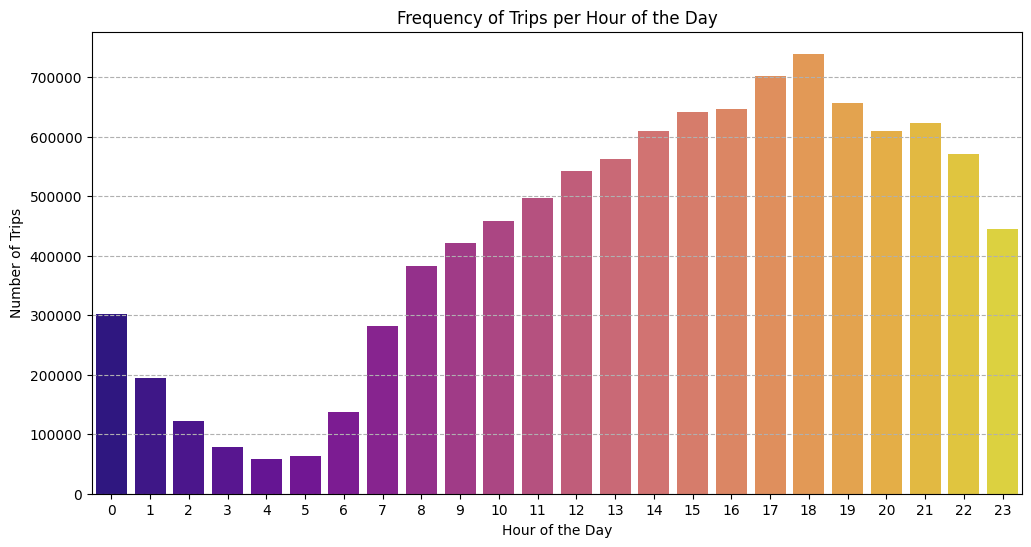

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='plasma')
plt.title('Frequency of Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

พบว่า peak hour ช่วงที่มีการเดินทางมากที่สุดคือช่วงเวลา 18.00  p.m.

อีกทั้งช่วงเวลาตอนเย็น 16.00 - 20.00 p.m. เป็นช่วงที่มีการเรียกใช้บริการมากที่สุด

#### frequency of trips per weekday


Frequency of trips per weekday:


,count
weekday,
Friday,1553146
Monday,1259416
Saturday,1617888
Sunday,1344951
Thursday,1560045
Tuesday,1527842
Wednesday,1486501


/tmp/ipython-input-177629288.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trips_per_weekday.index, y=trips_per_weekday.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],


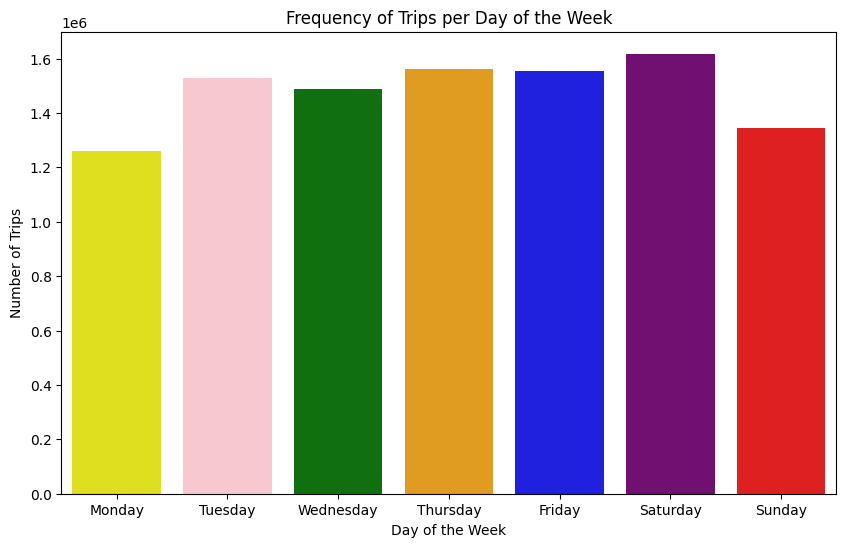

In [58]:
# Count the frequency of trips per weekday
trips_per_weekday = map_data['weekday'].value_counts().sort_index()
print("\nFrequency of trips per weekday:")
display(trips_per_weekday)

# Visualize the frequency of trips per weekday
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_per_weekday.index, y=trips_per_weekday.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            palette=('yellow','pink','g','orange','b','purple','r'))
plt.title('Frequency of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

พบว่า วันเสาร์เป็นวันที่มีการเดินทางและเรียกใช้บริการมากที่สุด

#### เดือนที่มีการเดินทางมากที่สุด

In [38]:
# Calculate the total amount per month
map_data.loc[:, 'month'] = map_data['date'].dt.to_period('M')
monthly_total_amount = map_data.groupby('month')['fare_amount'].sum()

/tmp/ipython-input-3684209280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data.loc[:, 'month'] = map_data['date'].dt.to_period('M')


In [39]:
monthly_total_amount = map_data.groupby(map_data['date'].dt.to_period('M'))['fare_amount'].sum()
print(monthly_total_amount)

date
2002-12    7.900000e+00
2009-01    1.334000e+02
2024-09    3.907000e+02
2024-10    7.071380e+07
2024-11    6.544855e+07
2024-12    6.770952e+07
2025-02    2.960000e+01
2025-03    3.960000e+01
Freq: M, Name: fare_amount, dtype: float32


/tmp/ipython-input-256682664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_total_amount.index, y=monthly_total_amount.values, palette='viridis')


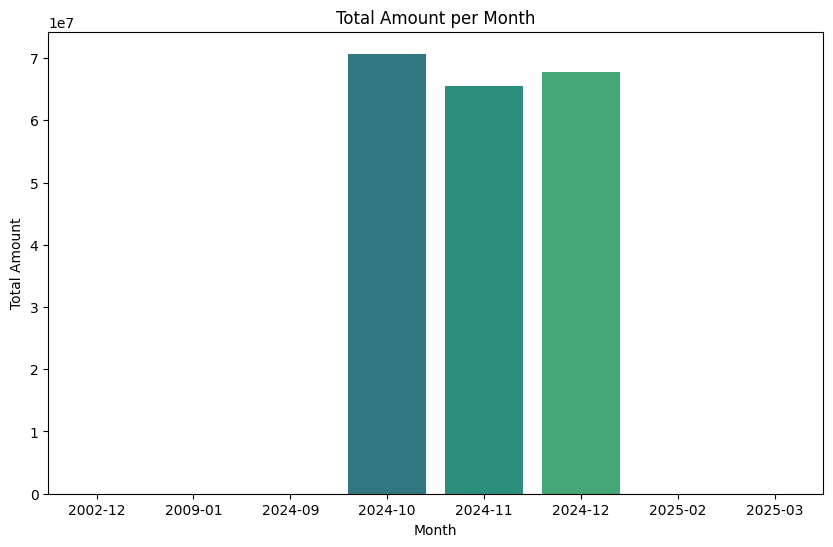

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_total_amount.index, y=monthly_total_amount.values, palette='viridis')
plt.title('Total Amount per Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.show()

เดือนที่มีการใช้บริการแท็กซี่มากที่สุด คือ เดือน ตุลาคม

#### นับจำนวนการเดินทางต่อเขต เพื่อดูว่าเขตไหนมีการเดินทางมากที่สุด

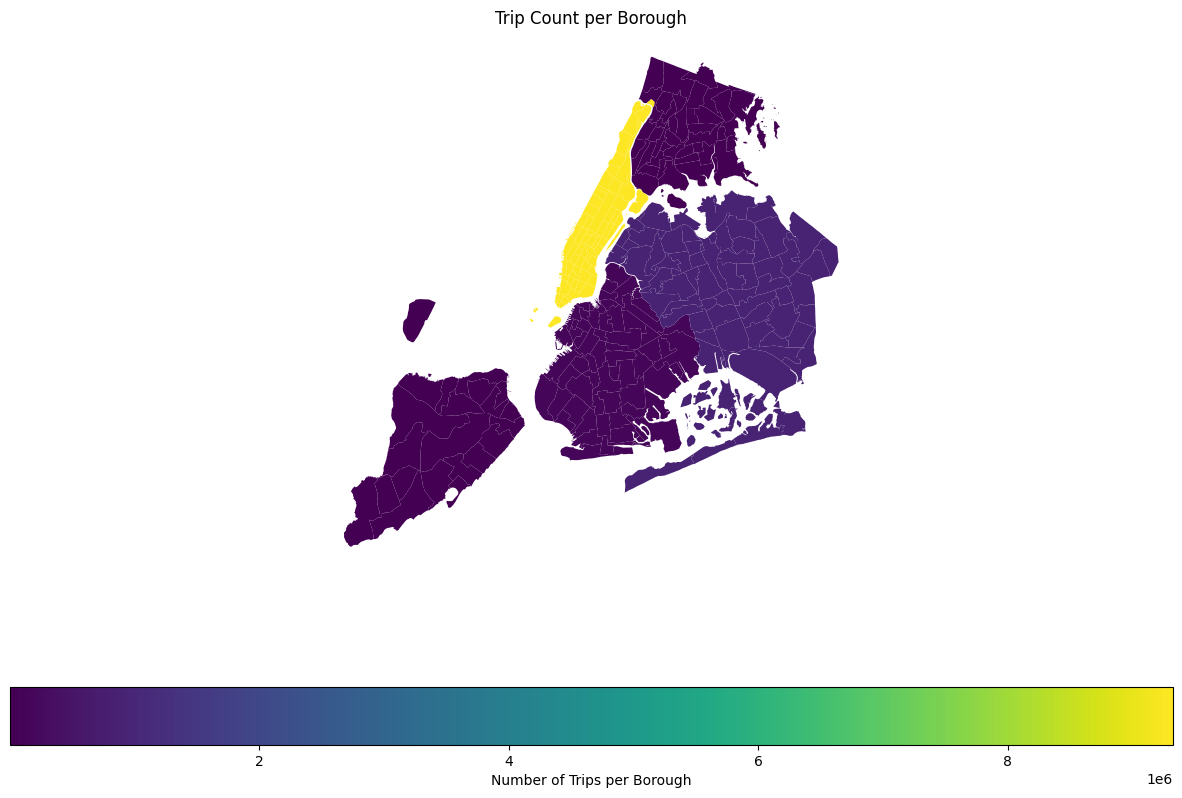

In [23]:
# Count the number of trips per borough
borough_counts = map_data['borough'].value_counts().reset_index()
borough_counts.columns = ['borough', 'trip_count']

# Merge the trip counts with the merged GeoDataFrame (which contains borough geometries)
borough_geo_data = merged_gdf.merge(borough_counts, on='borough', how='left')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
borough_geo_data.plot(column='trip_count', ax=ax, legend=True,
                      legend_kwds={'label': "Number of Trips per Borough",
                                   'orientation': "horizontal"})

ax.set_title('Trip Count per Borough')
ax.set_axis_off()
plt.show()

In [15]:
map_data['borough'].value_counts()

,count
borough,
Manhattan,9321118
Queens,892604
Brooklyn,118179
Bronx,17506
Staten Island,322
EWR,60


เขตที่มีการใช้บริการแท็กซี่มากที่สุด คือ Manhattan, Queens, Brookly, Bronx, Staten Island และ EWR ตามลำดับ


#### สถานที่ที่มีการไปรับและไปส่งบ่อยๆ

In [85]:
location_geo_data = merged_gdf.copy()
location_geo_data['pickup_count'] = map_data.groupby('LocationID')['PULocationID'].count()
location_geo_data['dropoff_count'] = map_data.groupby('LocationID')['DOLocationID'].count()


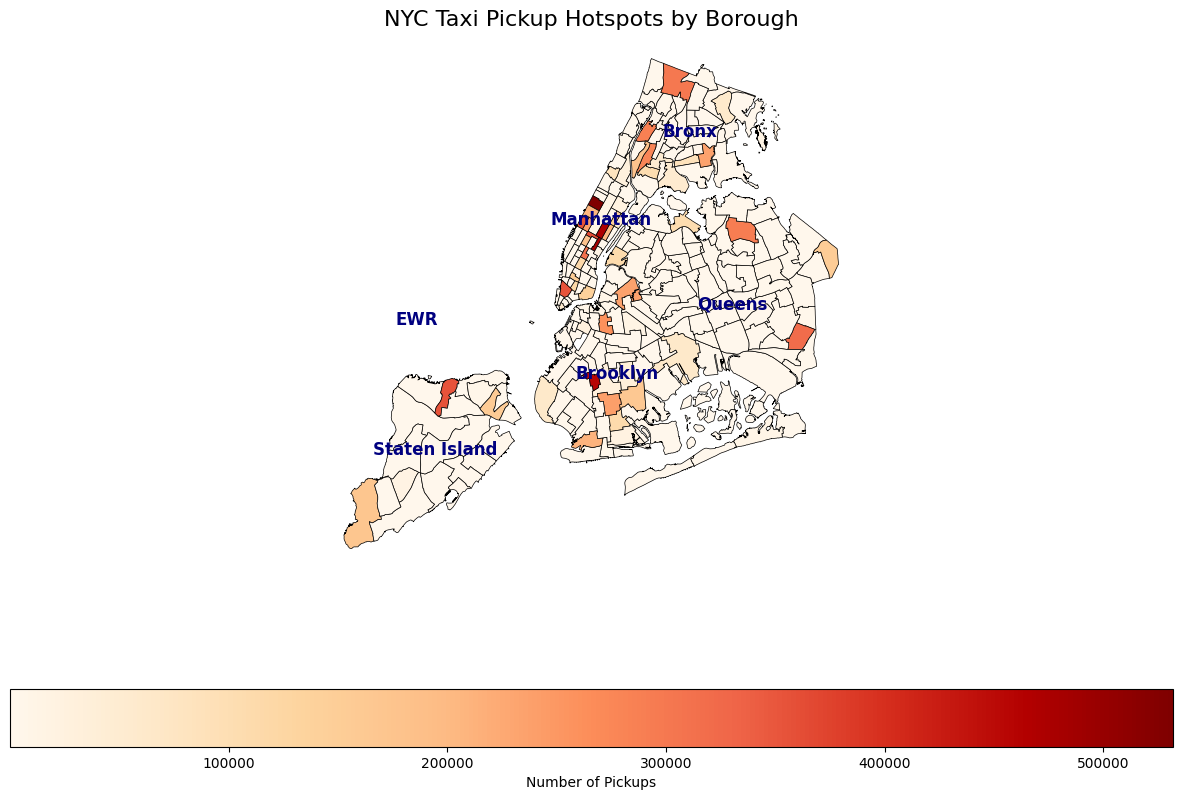

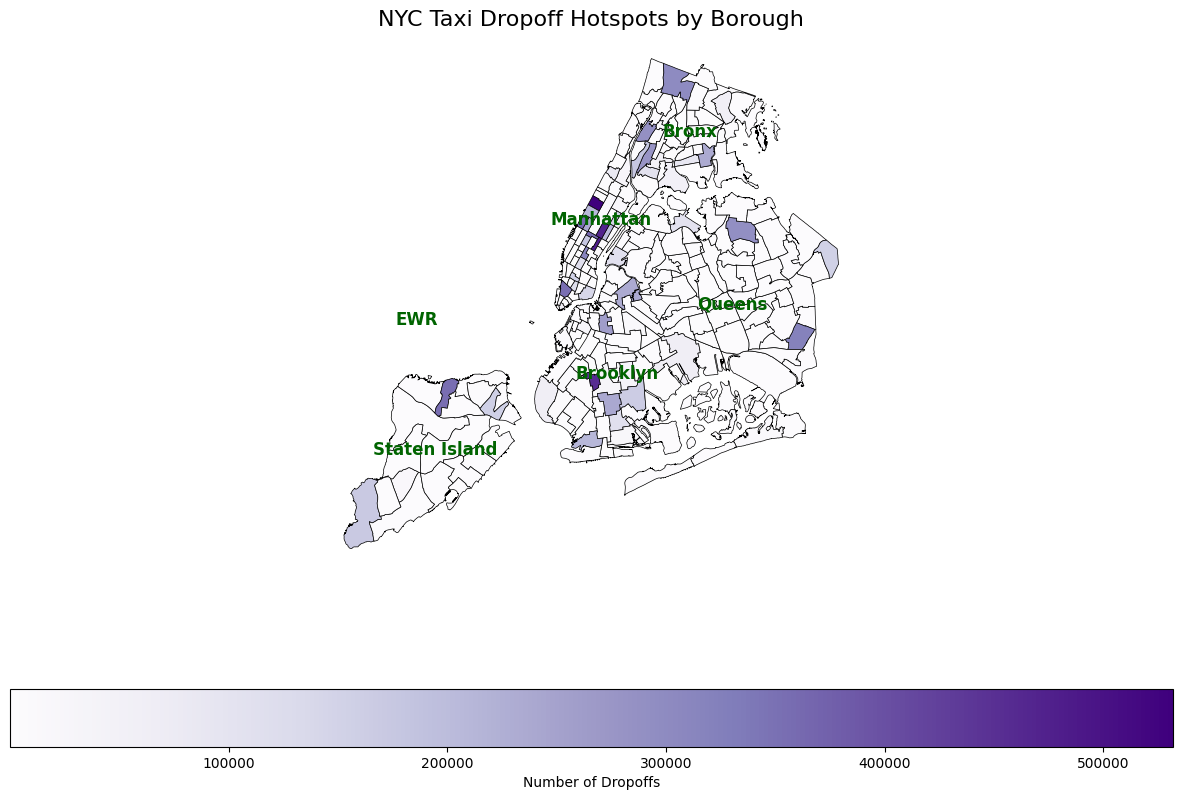

In [86]:
import matplotlib.pyplot as plt

# --------------------------------------------------
# แสดง Pickup Hotspots พร้อมชื่อ Borough
# --------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
location_geo_data.plot(
    column='pickup_count',
    ax=ax,
    legend=True,
    cmap='OrRd',
    legend_kwds={
        'label': "Number of Pickups",
        'orientation': "horizontal"
    },
    edgecolor='black',
    linewidth=0.5
)

# เพิ่มชื่อ Borough
borough_centroids = location_geo_data.dissolve(by='Borough').centroid
for idx, row in borough_centroids.items():
    x, y = row.x, row.y
    ax.text(
        x, y, idx, fontsize=12, fontweight='bold',
        color='navy', ha='center', va='center'
    )

ax.set_title('NYC Taxi Pickup Hotspots by Borough', fontsize=16)
ax.set_axis_off()
plt.show()

# --------------------------------------------------
# แสดง Dropoff Hotspots พร้อมชื่อ Borough
# --------------------------------------------------
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
location_geo_data.plot(
    column='dropoff_count',
    ax=ax,
    legend=True,
    cmap='Purples',
    legend_kwds={
        'label': "Number of Dropoffs",
        'orientation': "horizontal"
    },
    edgecolor='black',
    linewidth=0.5
)

# เพิ่มชื่อ Borough เช่นเดียวกัน
borough_centroids = location_geo_data.dissolve(by='Borough').centroid
for idx, row in borough_centroids.items():
    x, y = row.x, row.y
    ax.text(
        x, y, idx, fontsize=12, fontweight='bold',
        color='darkgreen', ha='center', va='center'
    )

ax.set_title('NYC Taxi Dropoff Hotspots by Borough', fontsize=16)
ax.set_axis_off()
plt.show()


#### ค่าโดยสารโดยเฉลี่ยต่อโซน

In [28]:
average_fare_per_zone = map_data.groupby('Zone')['fare_amount'].mean().reset_index()
average_fare_per_zone.columns = ['Zone', 'average_fare']
print(average_fare_per_zone)

                        Zone  average_fare
0    Allerton/Pelham Gardens     25.894970
1              Alphabet City     17.673586
2    Arrochar/Fort Wadsworth     23.941929
3                    Astoria     22.709728
4               Astoria Park     53.013184
..                       ...           ...
253       Woodlawn/Wakefield     30.964193
254                 Woodside     29.547945
255       World Trade Center     24.414289
256           Yorkville East     15.114237
257           Yorkville West     14.135009

[258 rows x 2 columns]


In [29]:
# Sort zones by average fare in descending order to see the highest
zones_highest_fare = average_fare_per_zone.sort_values(by='average_fare', ascending=False)
print("Zones with the Highest Average Fare Amount:")
display(zones_highest_fare.head(10)) # Display top 10

# Sort zones by average fare in ascending order to see the lowest
zones_lowest_fare = average_fare_per_zone.sort_values(by='average_fare', ascending=True)
print("\nZones with the Lowest Average Fare Amount:")
display(zones_lowest_fare.head(10)) # Display bottom 10

Zones with the Highest Average Fare Amount:


,Zone,average_fare
40,Charleston/Tottenville,78.485001
166,Newark Airport,70.096664
121,JFK Airport,63.009521
88,Flushing Meadows-Corona Park,61.640484
6,Baisley Park,61.157166
213,Springfield Gardens South,57.318241
124,Jamaica Bay,57.295235
4,Astoria Park,53.013184
201,Saint Michaels Cemetery/Woodside,52.643856
188,Randalls Island,52.001354



Zones with the Lowest Average Fare Amount:


,Zone,average_fare
102,Great Kills Park,10.000000
231,Upper East Side South,13.590000
230,Upper East Side North,13.833885
134,Lenox Hill West,13.883685
257,Yorkville West,14.135009
232,Upper West Side North,14.670541
233,Upper West Side South,14.733453
136,Lincoln Square West,14.808653
135,Lincoln Square East,15.082634
256,Yorkville East,15.114237


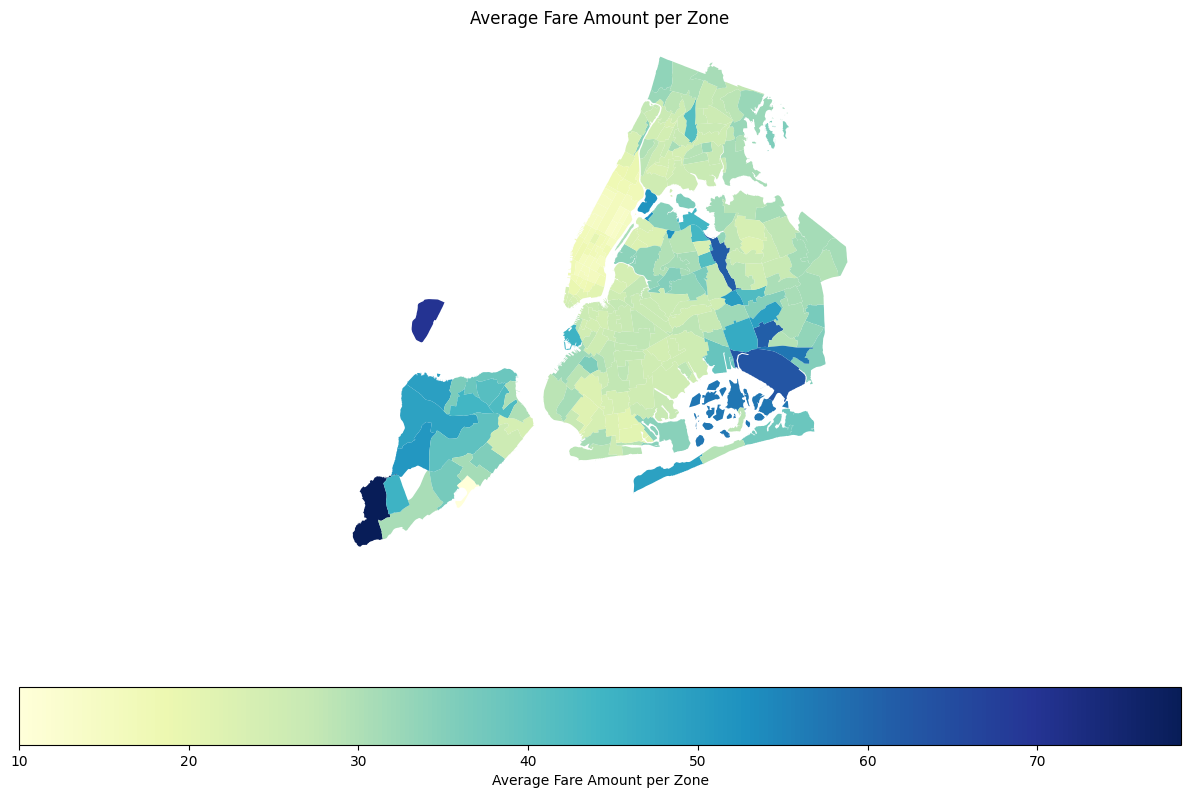

In [30]:
# Calculate the average fare amount per zone
average_fare_per_zone = map_data.groupby('Zone')['fare_amount'].mean().reset_index()
average_fare_per_zone.columns = ['Zone', 'average_fare']

# Merge the average fare data with the geographical zone data
zone_geo_data_fare = merged_gdf.merge(average_fare_per_zone, on='Zone', how='left')

# Plot the map of average fare amount per zone
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
zone_geo_data_fare.plot(column='average_fare', ax=ax, legend=True,
                        legend_kwds={'label': "Average Fare Amount per Zone",
                                     'orientation': "horizontal"}, cmap='YlGnBu')
ax.set_title('Average Fare Amount per Zone')
ax.set_axis_off()
plt.show()

โซนที่มีค่าเฉลี่ยค่าโดยสารมากที่สุด คือ Charleston/Tottenville, Newark Airport	and JFK Airport

และ

โซนที่มีค่าเฉลี่ยค่าโดยสารน้อยที่สุด คือ Great Kills Park, Upper East Side South and Upper East Side North

#### Location ไหนที่มีความถี่ของการไปรับและไปส่ง

In [62]:
#count PULocation and DOLocation to see top 10 most pickup and drop off places
pickup_location_counts = map_data['PULocationID'].value_counts()
dropoff_location_counts = map_data['DOLocationID'].value_counts()


/tmp/ipython-input-1887785044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_location_counts.head(top_n).index, y=pickup_location_counts.head(top_n).values, palette='viridis')


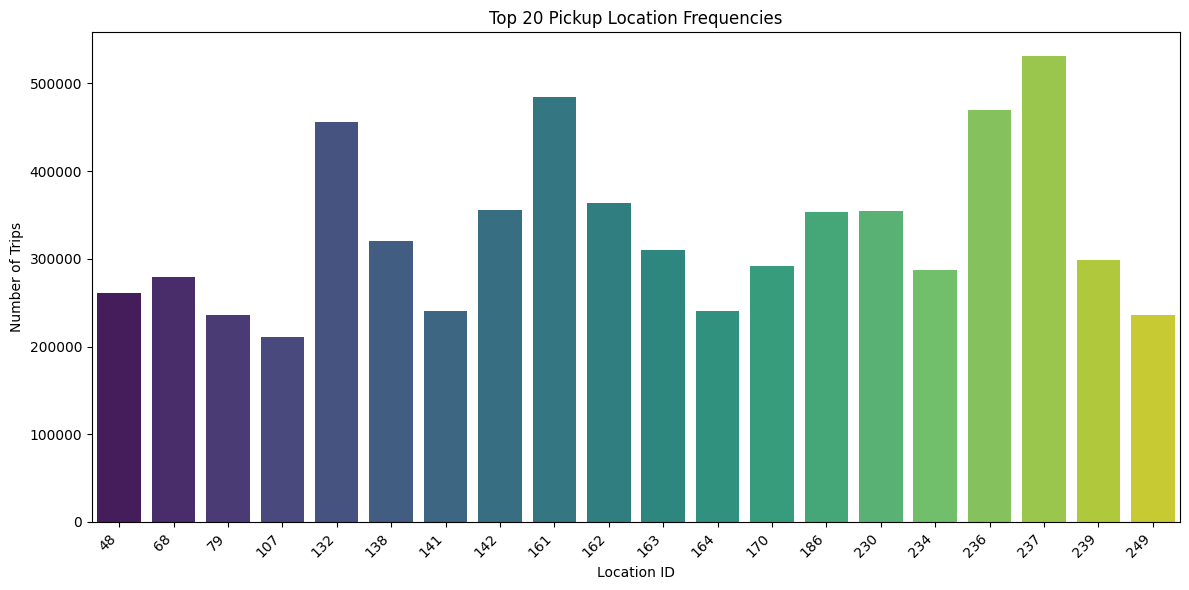

/tmp/ipython-input-1887785044.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dropoff_location_counts.head(top_n).index, y=dropoff_location_counts.head(top_n).values, palette='magma')


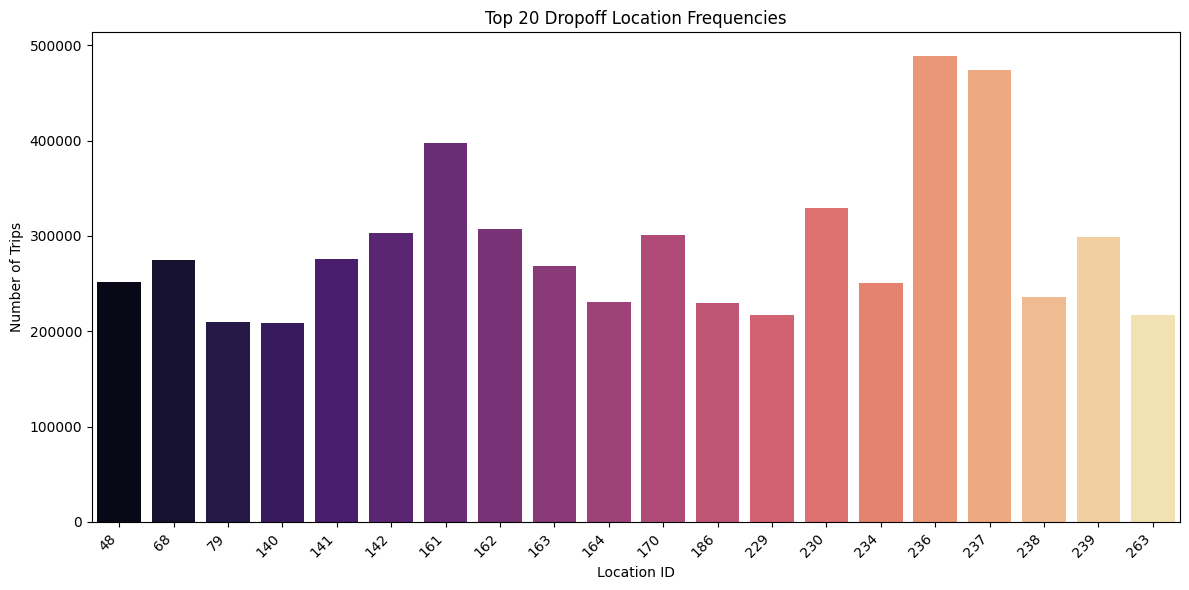

In [63]:
# Visualize top N pickup location frequencies
top_n = 20  # You can adjust the number of top locations to visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=pickup_location_counts.head(top_n).index, y=pickup_location_counts.head(top_n).values, palette='viridis')
plt.title(f'Top {top_n} Pickup Location Frequencies')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize top N dropoff location frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x=dropoff_location_counts.head(top_n).index, y=dropoff_location_counts.head(top_n).values, palette='magma')
plt.title(f'Top {top_n} Dropoff Location Frequencies')
plt.xlabel('Location ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [82]:
#Top 3 most pickup
zone_location[zone_location['LocationID'].isin([237, 161, 236])]

,LocationID,Borough,Zone,service_zone
160,161,Manhattan,Midtown Center,Yellow Zone
235,236,Manhattan,Upper East Side North,Yellow Zone
236,237,Manhattan,Upper East Side South,Yellow Zone


โลเคชั่นที่เป็นที่นิยมในการไปรับมากที่สุด คือ Midtown center, Upper East Side North and Upper East Side South

In [84]:
# Top 3 most drop off
zone_location[zone_location['LocationID'].isin([237, 236, 161,])]

,LocationID,Borough,Zone,service_zone
160,161,Manhattan,Midtown Center,Yellow Zone
235,236,Manhattan,Upper East Side North,Yellow Zone
236,237,Manhattan,Upper East Side South,Yellow Zone


โลเคชั่นที่เป็นที่นิยมสำหรับการไปส่งมากที่สุด 3 อันดับแรกคือ Midtown center, Upper East Side North and Upper East Side South